In [152]:
import pandas as pd

df = pd.read_csv("data/diabetes_prediction_dataset.csv")

In [153]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [157]:
df['diabetes'].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

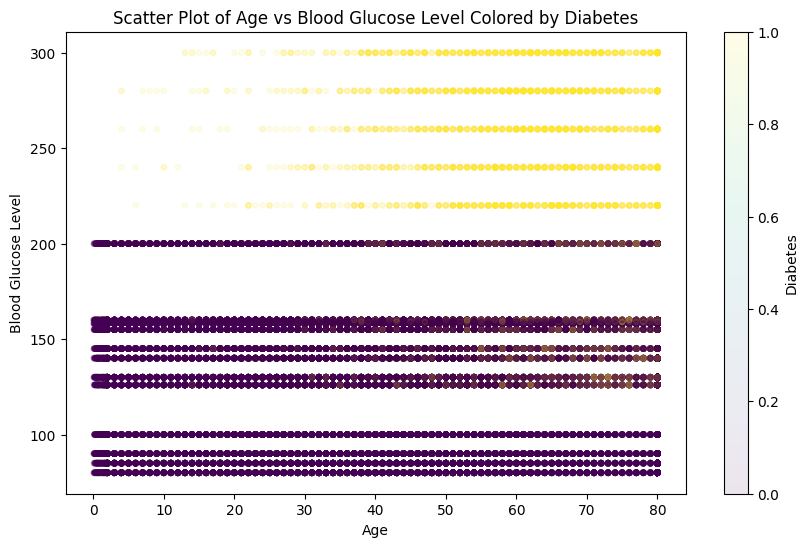

In [158]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['blood_glucose_level'], c=df['diabetes'], cmap='viridis', s=15, alpha=0.1)
plt.colorbar(label='Diabetes')
plt.xlabel('Age')
plt.ylabel('Blood Glucose Level')
plt.title('Scatter Plot of Age vs Blood Glucose Level Colored by Diabetes')
plt.show()

In [159]:
import numpy as np

def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]


In [160]:
train_set, test_set = split_train_test(df, 0.2)

In [161]:
train_set

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
75220,Male,73.0,0,0,former,24.77,3.5,80,0
48955,Male,80.0,0,0,never,24.60,5.7,145,1
44966,Female,38.0,0,0,ever,24.33,4.0,158,0
13568,Female,26.0,0,0,not current,18.87,5.0,100,0
92727,Female,61.0,1,0,current,22.11,4.5,85,0
...,...,...,...,...,...,...,...,...,...
6265,Male,49.0,0,0,never,32.98,5.7,80,0
54886,Female,15.0,0,0,never,28.10,5.0,159,0
76820,Male,42.0,0,0,never,26.14,5.8,85,0
860,Female,37.0,0,0,never,24.96,6.2,158,0


In [162]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["age"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [163]:
strat_test_set

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
30903,Female,43.0,0,0,never,26.85,4.5,160,0
35626,Female,80.0,1,0,never,27.32,6.1,160,0
27431,Female,3.0,0,0,No Info,16.46,5.8,90,0
11037,Male,76.0,0,0,No Info,27.32,6.5,158,0
22506,Male,20.0,0,0,never,27.32,6.1,160,0
...,...,...,...,...,...,...,...,...,...
82765,Female,12.0,0,0,No Info,19.65,6.0,100,0
76544,Female,39.0,0,0,not current,23.86,6.5,220,1
85575,Female,34.0,0,0,never,19.00,6.0,145,0
82448,Male,50.0,0,0,current,27.32,5.7,130,0


In [164]:
df_smoking = strat_train_set["smoking_history"].copy()
df_gender = strat_train_set["gender"].copy()
strat_train_set = strat_train_set.drop(['gender', 'smoking_history'], axis=1)
pred = strat_train_set.copy()

In [165]:
pred

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
90843,57.0,0,0,27.32,6.5,158,0
82495,26.0,0,0,25.69,5.7,145,0
83879,41.0,0,0,27.32,6.2,155,0
43483,54.0,0,0,42.95,6.1,158,0
47866,37.0,0,0,27.90,6.0,159,0
...,...,...,...,...,...,...,...
88512,65.0,0,0,27.32,4.5,80,0
62295,39.0,0,0,22.35,6.2,200,0
52129,27.0,0,0,27.32,4.5,160,0
93713,56.0,0,0,29.50,6.8,280,1


In [166]:
corr_matrix = pred.corr()

In [167]:
corr_matrix["diabetes"].sort_values(ascending=False)

diabetes               1.000000
blood_glucose_level    0.419143
HbA1c_level            0.399637
age                    0.257301
bmi                    0.216038
hypertension           0.195332
heart_disease          0.176650
Name: diabetes, dtype: float64

In [168]:
pred = strat_train_set.drop("diabetes", axis=1)
pred_labels = strat_train_set["diabetes"].copy()

In [169]:
df_smoking_encoded, df_smoking_cat = df_smoking.factorize()
df_gender_encoded, df_gender_cat = df_gender.factorize()

In [170]:
df_smoking_encoded[:10]

array([0, 0, 1, 0, 0, 0, 2, 1, 3, 0], dtype=int64)

In [171]:
df_gender_encoded[:10]

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [172]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
df_sm_1hot = encoder.fit_transform(df_gender_encoded.reshape(-1,1))
df_sm_1hot

<80000x3 sparse matrix of type '<class 'numpy.float64'>'
	with 80000 stored elements in Compressed Sparse Row format>

In [173]:
encoder.categories_

[array([0, 1, 2], dtype=int64)]

In [174]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy="mean")

imputer.fit(df_sm_1hot)

SimpleImputer()

In [175]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()
scaled_array = scaler.fit_transform(pred)
scaled_pred_df = pd.DataFrame(scaled_array, columns=pred.columns)
scaled_pred_df

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
0,0.671210,-0.283617,-0.204357,0.001785,0.908279,0.491504
1,-0.705584,-0.283617,-0.204357,-0.244134,0.160414,0.171586
2,-0.039393,-0.283617,-0.204357,0.001785,0.627829,0.417677
3,0.537972,-0.283617,-0.204357,2.359890,0.534346,0.491504
4,-0.217044,-0.283617,-0.204357,0.089290,0.440863,0.516113
...,...,...,...,...,...,...
79995,1.026512,-0.283617,-0.204357,0.001785,-0.961384,-1.428004
79996,-0.128219,-0.283617,-0.204357,-0.748041,0.627829,1.525086
79997,-0.661171,-0.283617,-0.204357,0.001785,-0.961384,0.540723
79998,0.626798,-0.283617,-0.204357,0.330683,1.188728,3.493813


In [176]:
corr_matrix = scaled_pred_df.corr()
# corr_matrix["diabetes"].sort_values(ascending=False)
corr_matrix

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
age,1.000000,0.249298,0.234807,0.337482,0.101069,0.110221
hypertension,0.249298,1.000000,0.117063,0.144667,0.078633,0.081281
heart_disease,0.234807,0.117063,1.000000,0.061765,0.068785,0.073374
bmi,0.337482,0.144667,0.061765,1.000000,0.082805,0.092180
HbA1c_level,0.101069,0.078633,0.068785,0.082805,1.000000,0.166789
blood_glucose_level,0.110221,0.081281,0.073374,0.092180,0.166789,1.000000


In [177]:
from sklearn.metrics import mean_squared_error

def mse(x, y):
    meanse = mean_squared_error(y, x)
    rmse = np.sqrt(meanse)
    print("RMSE: ", rmse)

In [178]:
from sklearn.tree import DecisionTreeClassifier

tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(pred, pred_labels)

DecisionTreeClassifier()

In [179]:
diabetes_predictions = tree_classifier.predict(pred)
tree_mse = mean_squared_error(pred_labels, diabetes_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0544288526426931

In [180]:
test_labels = test_set["diabetes"].copy()
test_prepared = test_set.drop(["diabetes", "gender", "smoking_history"], axis=1)
test_set_pred = tree_classifier.predict(test_prepared)

In [181]:
print("Prediction: ", test_set_pred[:30])
print("True Values: ", list(test_labels)[:30])

Prediction:  [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
True Values:  [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [182]:
mse(test_labels, test_set_pred)

RMSE:  0.11247221879201992


In [183]:
from sklearn.linear_model import LogisticRegression

#trying to train with LogisticRegression model
logistic_reg = LogisticRegression(max_iter=1000)
logistic_reg.fit(pred, pred_labels)

LogisticRegression(max_iter=1000)

In [184]:
test_labels = test_set["diabetes"].copy()
test_prepared = test_set.drop(["diabetes", "gender", "smoking_history"], axis=1)
test_set_pred = logistic_reg.predict(test_prepared)

In [185]:
print("Prediction: ", test_set_pred[:10])
print("True Values: ", list(test_labels)[:10])
# print([list(test_labels)[i] - test_set_pred[i] for i in range(100)])

Prediction:  [0 0 0 0 0 0 0 0 0 0]
True Values:  [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]


In [186]:
mse(test_labels, test_set_pred)

RMSE:  0.20334699407662754


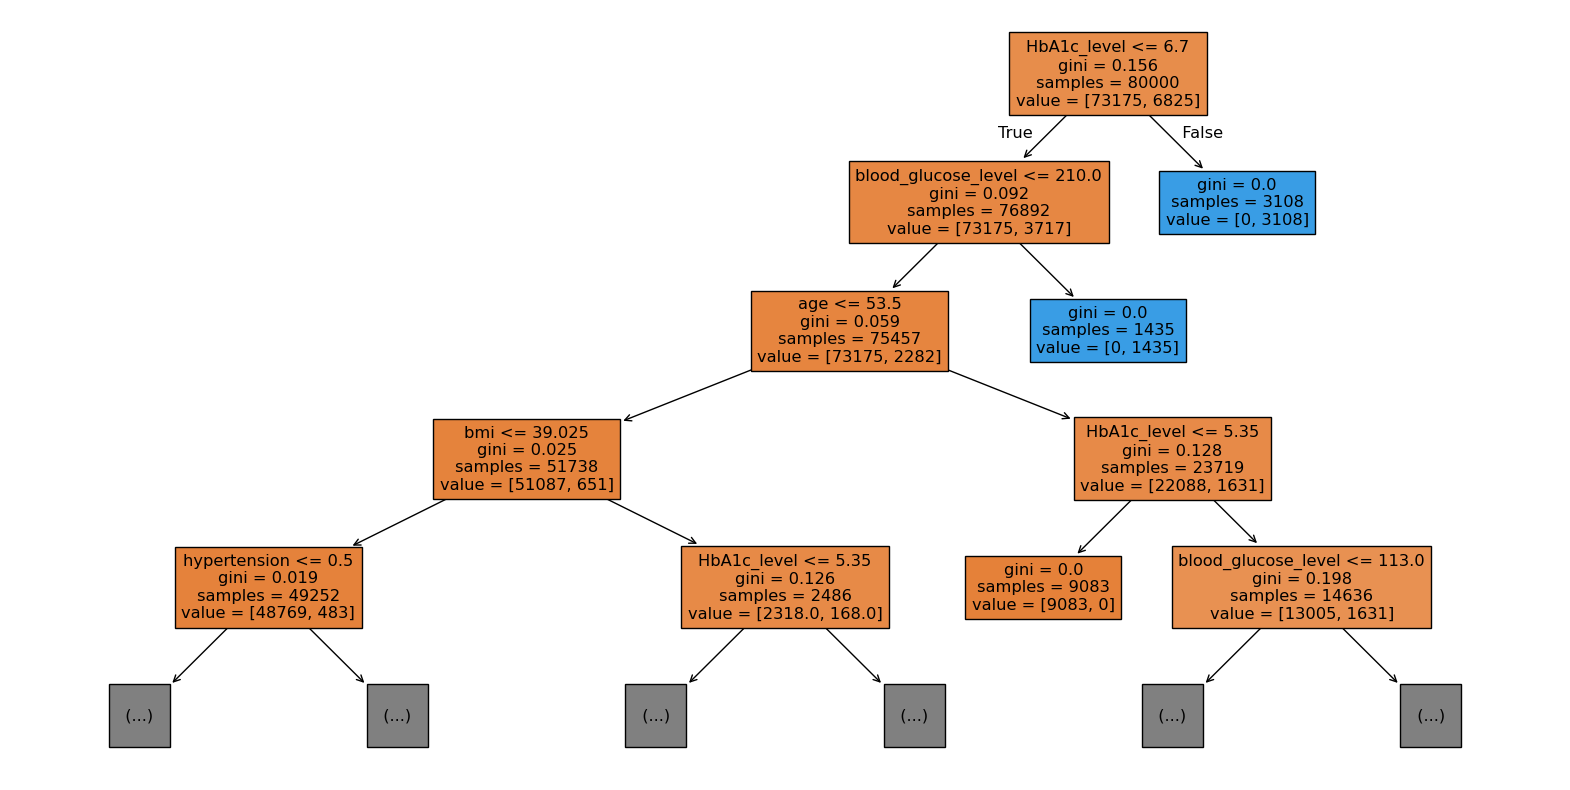

In [187]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(tree_classifier, feature_names=pred.columns, filled=True, max_depth=4)  # Added max_depth for better visualization
plt.show()